In [1]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 28
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.linewidth'] = 1

# Data

## Kang 2018: https://arxiv.org/abs/1807.08356

In [14]:
def Rkin_to_Rphot(Rkin):
    '''
    Rkin and Rphot in log(kpc)
    '''
    Rkin = np.atleast_1d(Rkin)
    return 2*Rkin

def lum_size_func(lum_O3):
    '''
    Ref: https://arxiv.org/abs/1807.08356
    lum_O3 in log(erg/s), return logR_out
    '''
    logRout = 0.277 * lum_O3 - 11.23247
    # logRout = k * lum_O3 + b
    # logRout_up = 0.28 * lum_O3 - 11.27 + 0.14
    # logRout_down = 0.28 * lum_O3 - 11.27 - 0.14
    # return Rkin_to_Rphot(logRout), Rkin_to_Rphot(logRout_up), Rkin_to_Rphot(logRout_down)
    return logRout

In [15]:
lum_O3 = np.linspace(40, 45, 100)
Rout = lum_size_func(lum_O3)

In [6]:
refdata = np.loadtxt('../photometry/code/radial_profile/lum_size_ref.csv', delimiter=',', usecols=(0,1,2))
refdata.shape
data, data_up, data_down = refdata[0::3,:], refdata[1::3,:], refdata[2::3,:]
refsizes = np.loadtxt('../photometry/code/radial_profile/kin_to_phot_size.csv', delimiter=',')
sort_refsizes = refsizes.reshape((22,2,2))

In [17]:
kin_to_phot = np.max(sort_refsizes, axis=1)
y1 = kin_to_phot[:, 0]
y2 = kin_to_phot[:, 0] + np.log10(2)
sort_index = np.argsort(kin_to_phot, axis=0)[:, 0]
sorted_kin_to_phot = kin_to_phot[sort_index]
k = (0.84-0.01)/(43.49-40.50)
b = 0.01 - k*40.50
y = k*lum_O3 + b

In [8]:
data_sorted_index = np.argsort(data[:,1])
data_sorted = data[data_sorted_index]
data_up_sorted = data_up[data_sorted_index]
data_down_sorted = data_down[data_sorted_index]

## Keel 2015

In [9]:
keels_data = np.loadtxt('../photometry/code/radial_profile/Keels.csv', delimiter=',', skiprows=1, usecols=(1,5))

## Harrison 2014

In [10]:
Harrisons_data = np.loadtxt('../photometry/code/radial_profile/Harrisons.csv', delimiter=',', skiprows=1, usecols=(2,3))

## Sun 2016

In [11]:
Suns_data = np.loadtxt('../photometry/code/radial_profile/Suns.csv', delimiter=',', usecols=(0,1))

# Plot

/tmp/ipykernel_1160295/1290302110.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(keels_data[:,1]), np.log10(keels_data[:,0]), marker='s', color='orange', label='Keel 2015')


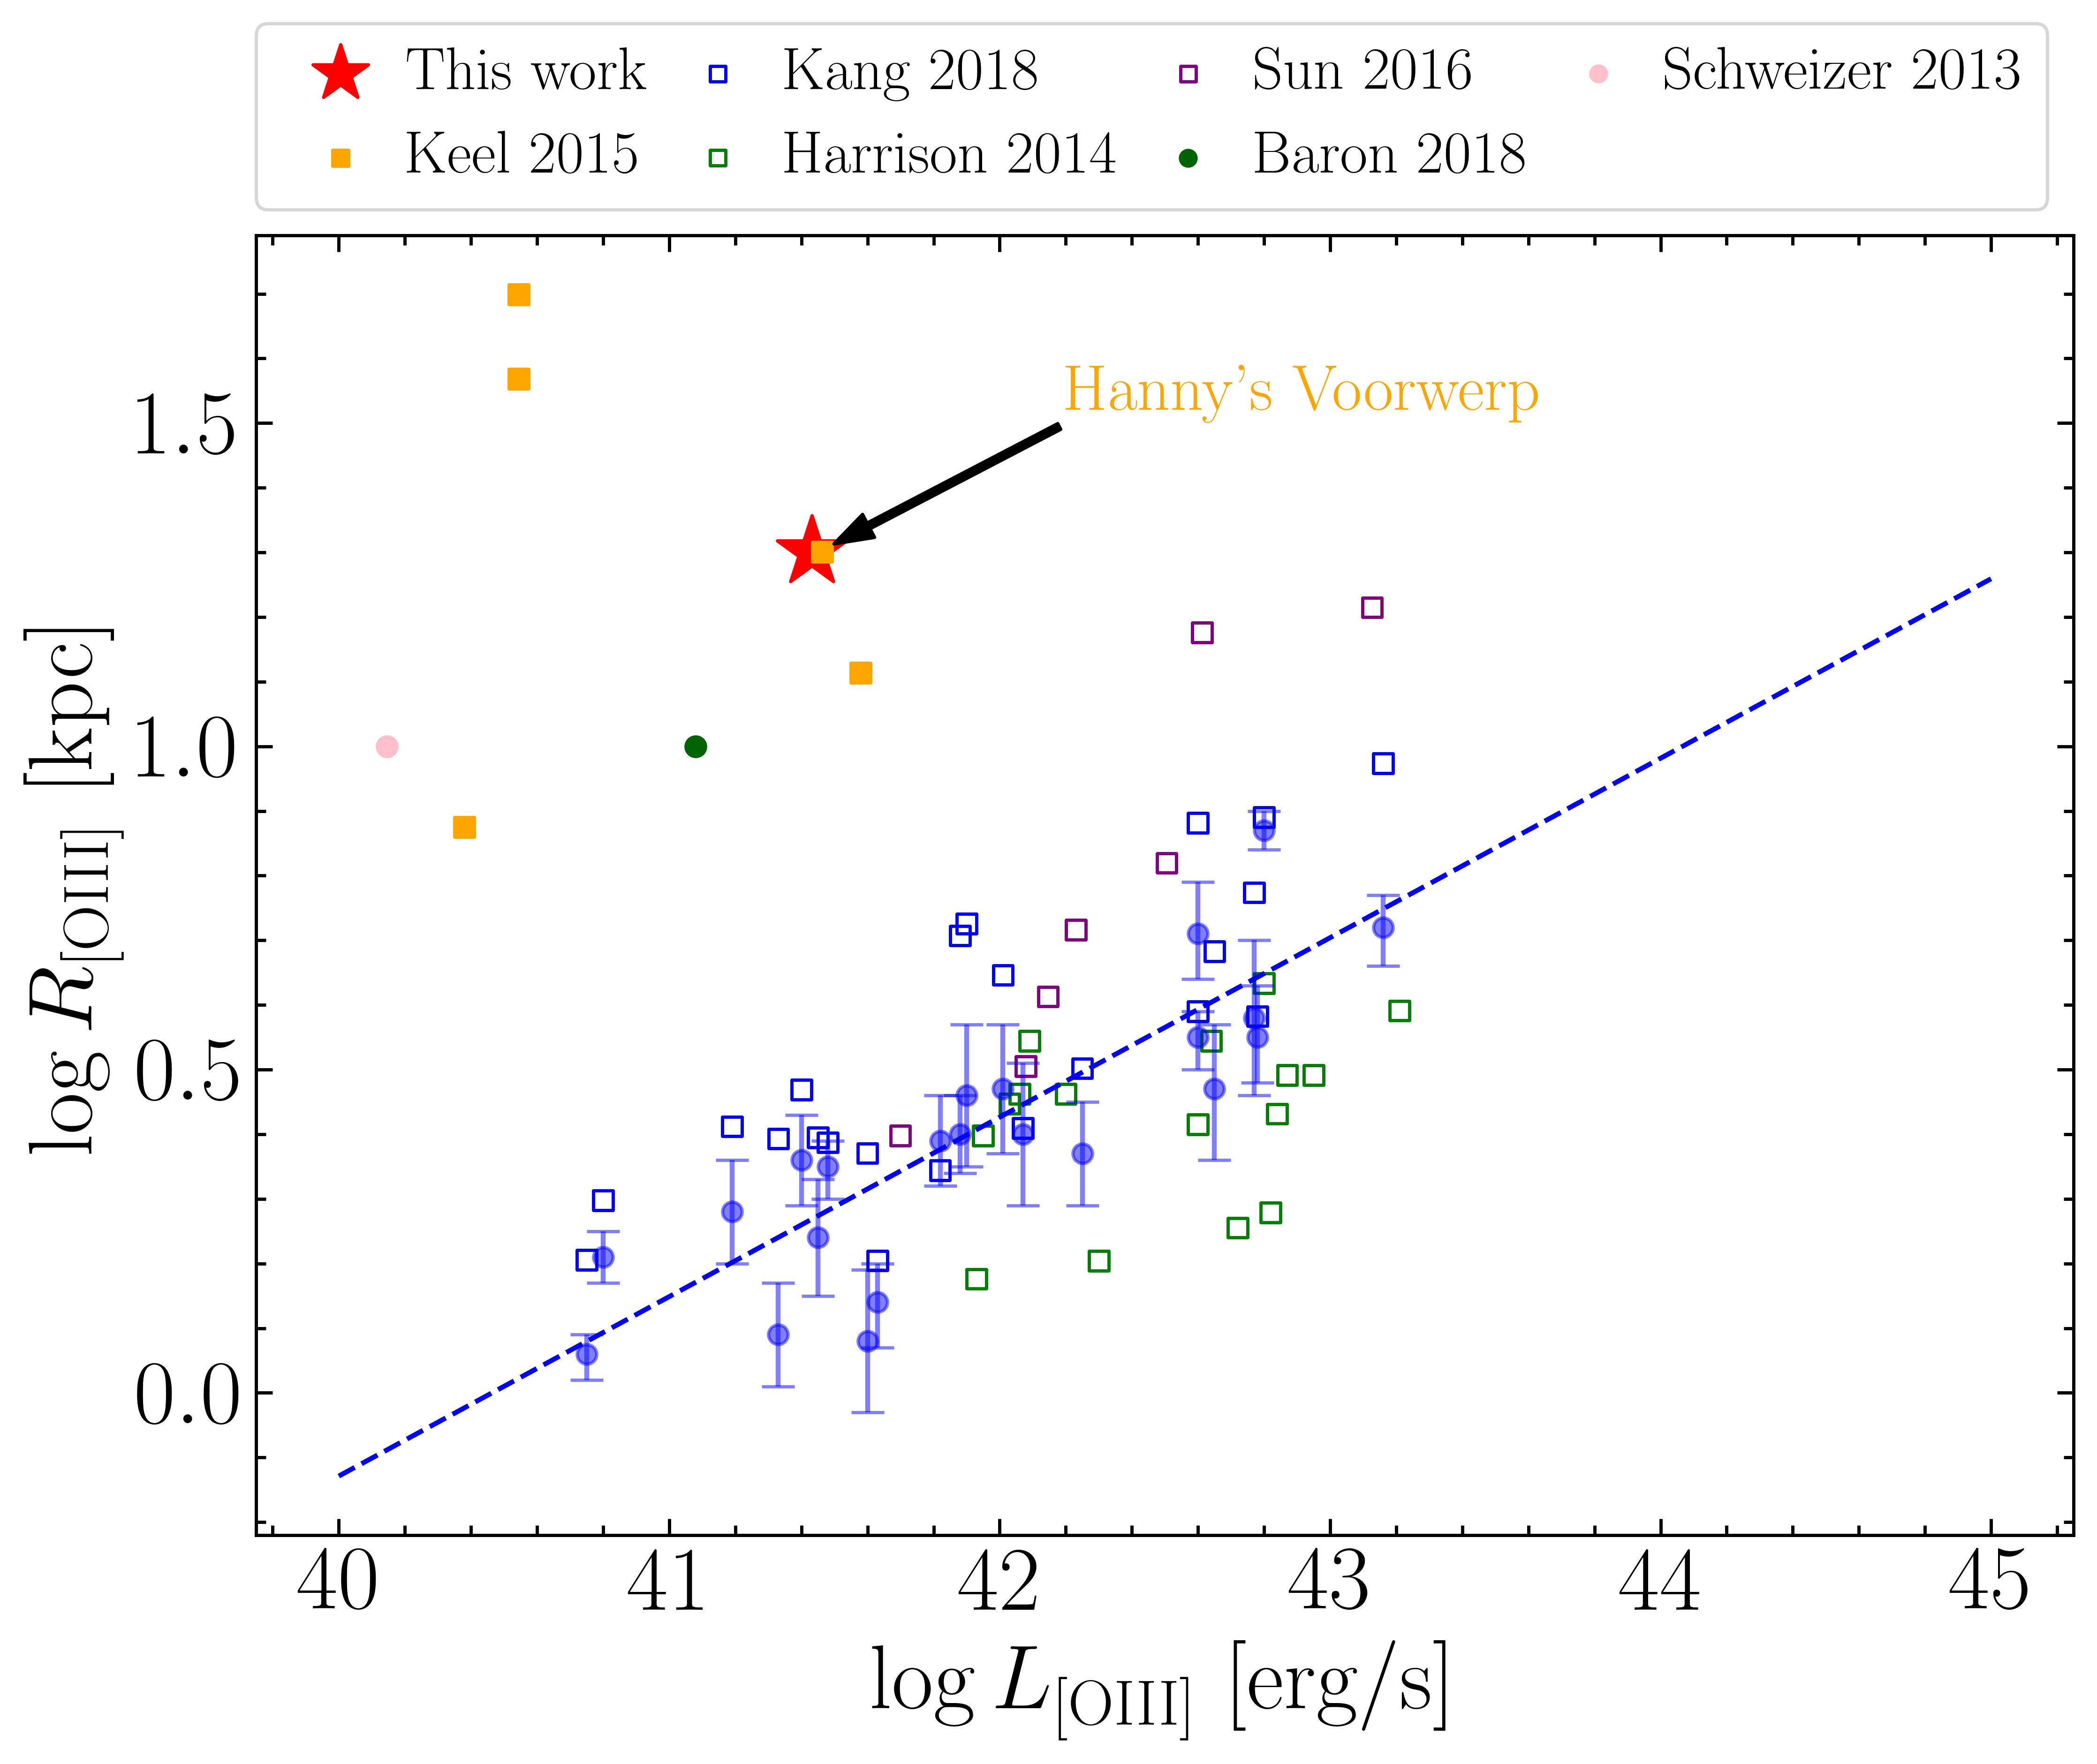

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(lum_O3, y, 'b--')
# ax.fill_between(lum_O3, Rout_up, Rout_down, alpha=0.3)
ax.scatter(np.log10(2.7e41), np.log10(20), s=500, c='r', marker='*', label='This work')
ax.errorbar(np.log10(2.7e41), np.log10(20), xerr=, yerr=, fmt='o', c='r', markersize=500, capsize=5, label='This work')
ax.errorbar(data_sorted[:,0], data_sorted[:,1], yerr=[data_up_sorted[:,1]-data_sorted[:,1], data_sorted[:,1]-data_down_sorted[:,1]], fmt='o', c='b', capsize=5, alpha=0.5)
ax.scatter(np.log10(keels_data[:,1]), np.log10(keels_data[:,0]), marker='s', color='orange', label='Keel 2015')
ax.scatter(data_sorted[:,0], sorted_kin_to_phot[:,1], marker='s', facecolors='none', edgecolors='b', label='Kang 2018')
ax.scatter(Harrisons_data[:,1], np.log10(Harrisons_data[:,0]), marker='s', facecolors='none', edgecolors='g', label='Harrison 2014')
ax.scatter(np.log10(Suns_data[:,1]), np.log10(Suns_data[:,0]), marker='s', facecolors='none', edgecolors='purple', label='Sun 2016')
ax.scatter(np.log10(1.2e41), np.log10(10), marker='o', color='darkgreen', label='Baron 2018')
ax.scatter(np.log10(1.4e40), np.log10(10), marker='o', color='pink', label='Schweizer 2013')
ax.annotate('Hanny\'s Voorwerp',
            xy=(np.log10(2.9e+41)+0.036, np.log10(2.0e+01)+0.012),  # theta, radius
            xytext=(42.2, 1.5),    # fraction, fraction
            color='orange',
            fontsize=20,
            arrowprops=dict(facecolor='k', shrink=1, width=2, headwidth=8),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
ax.set_xlabel('$\\log L_{\\rm [OIII]}$ [erg/s]')
ax.set_ylabel('$\\log R_{\\rm [OIII]}$ [kpc]')
# ax.set_xlim(40, 50)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0 - box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(bbox_to_anchor=(0, 1.02, box.width*0.9, box.height * 0.1), loc=3,
           borderaxespad=0., ncols=4, columnspacing=0.15, fontsize=18.5, markerscale=0.8, handletextpad=0.1)
plt.savefig('lum_size.png', bbox_inches='tight')
plt.show()